# Algorytmy rozpoznawania twarzy „feature-based”

Najprostsze algorytmy detekcji twarzy opierają się na wykrywaniu pewnych prostych wzorców geometrycznych o wysokim kontraście (ciemne i jasne plamy). Oryginalnie taki algorytm (zwany klasyfikatorem kaskadowym wykorzystującym cechy Haara) został zaproponowany przez Paula Violę i Michaela Jonesa w 2001 roku.







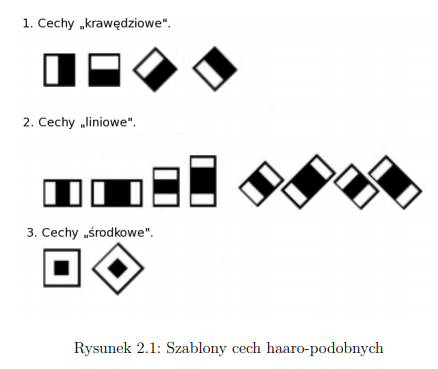






















Bibliografia:
https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf
http://opencvpopolsku.blogspot.com/2014/02/wykrywanie-twarzy-w-opencv.html
https://www.robotyka.ia.pw.edu.pl/papers/pwilkowski-msc-09-twiki.pdf

# Rozpoznawanie twarzy za pomocą wielozadaniowych, kaskadowych głębokich sieci neuronowych. 
Zadanie rozpoznania twarzy odbywa się w 3 etapach, gdzie do każdego użyta jest inna sieć. Dzięki używaniu na początku słabszych a następnie coraz mocniejszych sieci można pogodzić dokładność z wydajnością. Z początku mniej dokładne sieci wyznaczają dużo potencjalnych kandydatów(okien), a następne dokładniejsze sieci skupiają się tylko na tych kandydatach, eliminując znaczną ich część, nie musząc przy tym wykonywać tak dużej ilości obliczeń, jakie musiałyby wykonać sprawdzając wszystkie możliwe okna. 
W pierwszym etapie, użyta jest prosta sieć(Proposal Network), która służy do wydajnego wyznaczenia okien-kandydatów - oraz określenia rozmiarów tych okien. Następnie za pomocą metody NMS(służącej do wykrywania krawędzi) najbardziej nachodzące na siebie okna zostają ze sobą złączone. 
 
 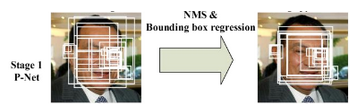
 
Następnie kolejna sieć(Refine Network) spośród uzyskanych wcześniej okien odrzuca znaczną część, poprzez dokładniejsze sprawdzenie okien, następnie dzięki NMS złącza się nachodzących kandydatów.  
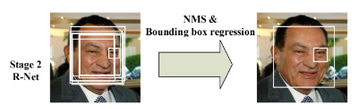
 
Na samym końcu użyta jest najmocniejsza, podobna do poprzedniej, sieć(Output Network), która dokonuje ostatecznego wyboru, dodatkowo oznaczając 5 specyficznych elementów twarzy - nos, oczy, oraz oba kąciki ust. 
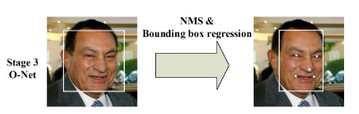

Bibliografia: "Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks" - Kaipeng Zhang, Zhanpeng Zhang, Zhifeng Li, Senior Member, IEEE, and Yu Qiao, Senior Member, IEEE : https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf 

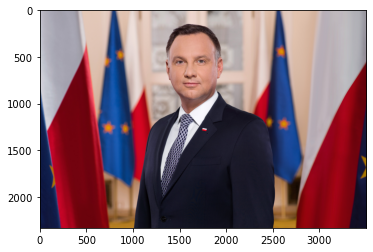

In [1]:
#displaying a picture
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/0152.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [13]:
#example eye classifier
eye_cascade = cv.CascadeClassifier('features/haarcascade_eye.xml')
img = cv.imread('images/prezydent.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('features/haarcascade_frontalface_default.xml')
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
##for (x,y,w,h) in faces:
  #  roi_gray = gray[y:y+h, x:x+w]
  #  roi_color = img[y:y+h, x:x+w]
  #  eyes = eye_cascade.detectMultiScale(roi_gray)#

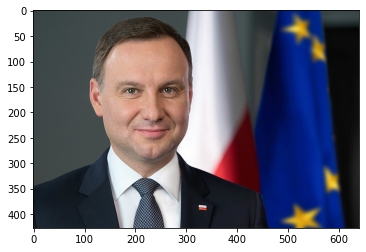

In [14]:
for (ex,ey,ew,eh) in eyes:
    cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [150]:
#face classifier
face_cascade = cv.CascadeClassifier('features/haarcascade_frontalface_default.xml')

img = cv.imread('images/facerecognition1.jpg')
gray = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

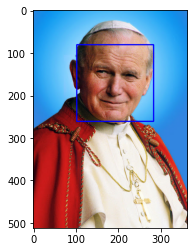

In [151]:
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [166]:
img = cv.imread('images/malysz2.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

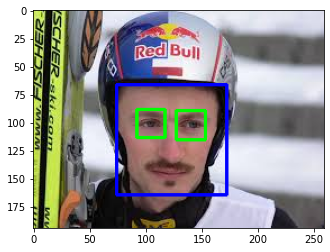

In [167]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [181]:
#group picture
img = cv.imread('images/krolewska4.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

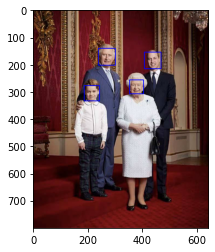

In [182]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))